# 학번: 20191624

# 이름: 신봉균

# 전공: AI빅데이터전공

### 연습문제 4.2

#### 도수분포표(상대도수 포함)

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_name= font_manager.FontProperties(fname='C:\Windows\Fonts\H2GTRE.TTF').get_name()
rc('font',family=font_name)


brothers = np.array([1,5,2,1,3,4,2,2,1,1,
                    3,2,3,1,4,1,1,2,5,1,
                    2,2,2,1,2,3,2,2,2,2,
                    2,2,3,3,2,1,2,2,2,1,
                    1,3,1,3,3,2,1,1,2,2])
table= pd.crosstab(brothers, colnames=['형제수'], columns='도수')
table.index=['1명','2명','3명','4명','5명']
table['상대도수']=np.round(table.도수/sum(table.도수),2)

print(table)


형제수  도수  상대도수
1명   15  0.30
2명   22  0.44
3명    9  0.18
4명    2  0.04
5명    2  0.04


#### 막대그래프

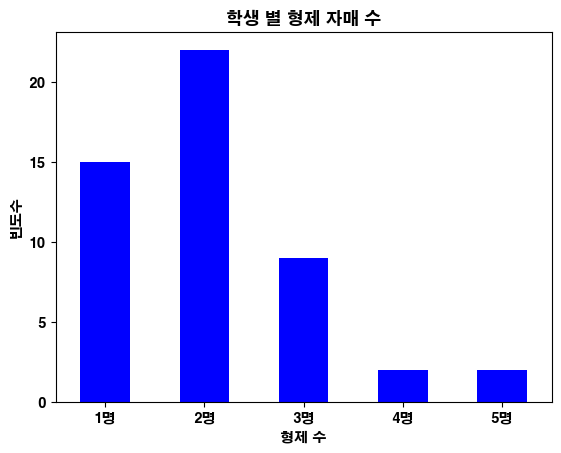

In [6]:
table['도수'].plot(kind='bar', color='blue', legend=False)
plt.xlabel('형제 수')
plt.ylabel('빈도수')
plt.title("학생 별 형제 자매 수")
plt.xticks(rotation=0)
plt.show()

#### 원형 그래프

<function matplotlib.pyplot.show(close=None, block=None)>

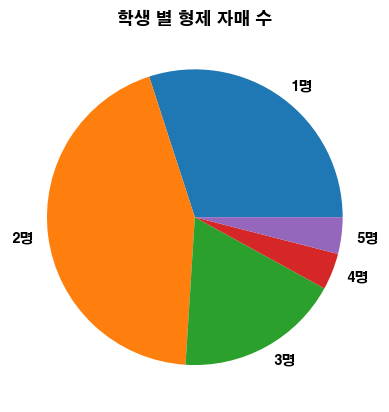

In [7]:
plt.figure()
plt.pie(table['도수'], labels=table.index)
plt.rc('font',size= 10)
plt.title('학생 별 형제 자매 수')
plt.show

## 연습문제 5.8

#### (1)계급의 수를 7, 첫 계급구간의 시작점을 39.5로 하여 도수분포표를 작성하고, 히스토그램을 그려라.

In [8]:
import numpy as np
import pandas as pd

student_result = np.array([54,80,83,42,86,63,63,57,71,84,77,59,
                          90,73,81,76,56,81,85,51,94,66,73,88,
                          89,87,56,84,61,78,83,91,58,50,82])

width = round((max(student_result)-min(student_result))/7) #최솟값:42, 최댓값:94, 계급의 수:7개  폭= (94-42)/7=7.428571428571429=7.5
gap = pd.crosstab(pd.cut(student_result, bins=np.arange(39.5, 92.1, 7.5)),colnames=['경계'], columns='도수')
#pandas의 cut 함수를 사용하여 39.5 시작점에서 7.5간격으로 구간을 나누었다.
gap['상대도수']= gap['도수']/sum(gap['도수'])
print(gap)

print(round(sum(gap[3:]['도수'])/sum(gap['도수']),2)) # 62점이상
print(round(sum(gap[:2]['도수'])/sum(gap['도수']),2))#55점미만

경계            도수      상대도수
row_0                     
(39.5, 47.0]   1  0.029412
(47.0, 54.5]   3  0.088235
(54.5, 62.0]   6  0.176471
(62.0, 69.5]   3  0.088235
(69.5, 77.0]   5  0.147059
(77.0, 84.5]   9  0.264706
(84.5, 92.0]   7  0.205882
0.71
0.12


#### 히스토그램

####  density=True 옵션을 사용하면, 히스토그램의 직사각형의 높이가 상대도수/구간폭 으로 자동으로 계산됩니다.

#### 보편적으로 밑변의 길이를 동일하게 해주는 이유는 각 직사각형의 면적을 구하지 않고도 높이만 보고 상대 도수를 비교할 수 있기 때문

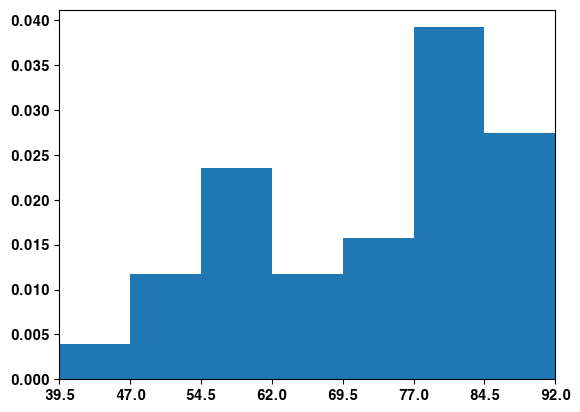

In [94]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

student_result = np.array([54,80,83,42,86,63,63,57,71,84,77,59, #학생들의 점수
                          90,73,81,76,56,81,85,51,94,66,73,88,
                          89,87,56,84,61,78,83,91,58,50,82])
plt.figure()
n, bins, patches = plt.hist(student_result, bins= np.arange(39.5,92.1,7.5), density=True)
plt.xlim(39.5,92)
plt.xticks(bins) #x축의 경계 값을 bins로 설정
plt.show()

#### (2)줄기의 개수가 11인 줄기-잎 그림을 그리고, 문제 (1)의 히스토그램과 비교하라.

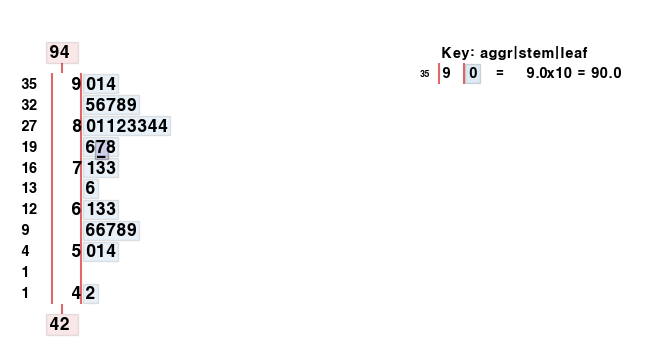

In [99]:
import stemgraphic    #줄기-잎 라이브러리를 아나콘다 프롬트에서 설치하여 사용
stemgraphic.stem_graphic(student_result) #줄기-잎 함수 사용
plt.show()                               #그림 보여주기

#### (3)문제(1)의 히스토그램을 이용하여 상대도수다각형을 그려라.

#### 도수다각형

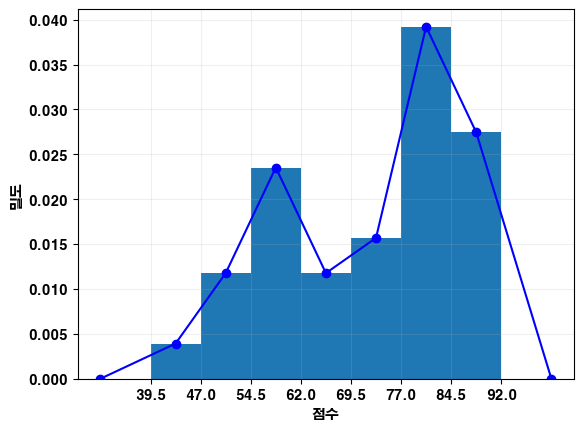

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import font_manager, rc

font_name= font_manager.FontProperties(fname='C:\Windows\Fonts\H2GTRE.TTF').get_name()
rc('font',family=font_name)

student_result = np.array([54,80,83,42,86,63,63,57,71,84,77,59, #학생들의 점수
                          90,73,81,76,56,81,85,51,94,66,73,88,
                          89,87,56,84,61,78,83,91,58,50,82])
plt.figure()         #도표의 사이즈 조절 figsize=(5,2)
n, bins, patches = plt.hist(student_result, bins= np.arange(39.5,92.1,7.5), density=True)# 히스토그램에 x축 경계값은 39.5부터 92까지 7.5간격
plt.xticks(bins) #x축의 구간별 경계 값을 x축을표시
hist_center= [(bins[i]+bins[i+1])/2 for i in range(0,len(bins)-1)] # 도수다각형을 그리기위한 x의 구간별 중간 값 저장
w_bin = bins[1]-bins[0]               #간격 저장
hist_center.insert(0,bins[0]-w_bin)    #도수다각형 표가 끊기지 않게 x값 설정
hist_center.append(bins[-1]+w_bin)
n= np.append(n,0)                      #도수다각형 표가 끊기지 않게 y값 설정
n= np.insert(n,0,0)
plt.plot(hist_center,n,'blue',marker='o') #히스토그램에 line plot추가
plt.xticks(bins)
plt.xlabel('점수')
plt.ylabel('밀도')
plt.grid(True, alpha= 0.2)                #표 배경에 그리드 를 나타내준다 alpha는 투명도를 나타낸다
plt.show()                                #그래피 보기

## 연습문제 5.9

#### (1)분포의 모양을 54.5 ~ 62점 77 ~ 84.5점 에 학생이 몰려있는 것을 알 수 있다.

##### (2)성적이 62점 이상인 비율은 round(sum(gap[3:]['도수'])/sum(gap['도수']),2)= 24/34 약 71퍼센트이다.

##### (3)55점 미만의 학생들은  round(sum(gap[:2]['도수'])/sum(gap['도수']),2)= 약 12 퍼센트이다.

## 연습문제 5.10

##### (1)자료가 집중된 부분은 세분화하고, 그렇지 못한 부분은 넓은 계급구간을 사용하여 연습문제 5.8의 (1)에서 작성된 히스토그램보다 좀 더 많은 정보를 포함하는 히스토 그램을 그려라.

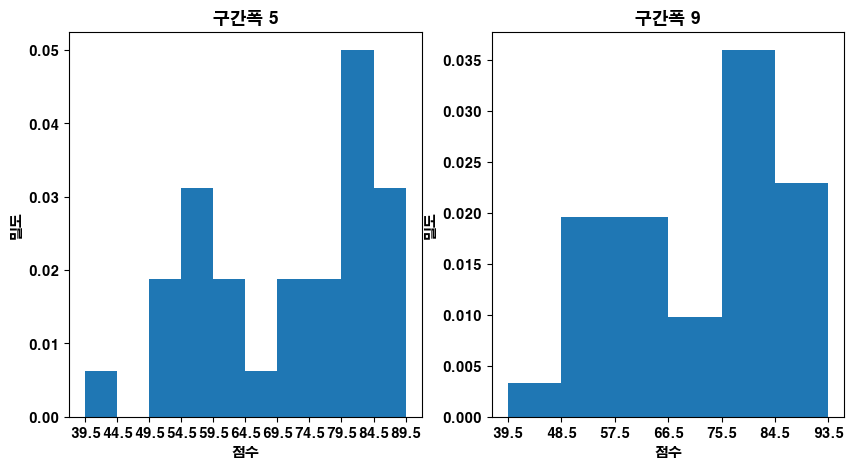

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

student_result = np.array([54,80,83,42,86,63,63,57,71,84,77,59, #학생들의 점수
                          90,73,81,76,56,81,85,51,94,66,73,88,
                          89,87,56,84,61,78,83,91,58,50,82])

fig, axs = plt.subplots(1, 2, figsize=(10, 5))        #그래프 동시에 여러개 보여주는 함수 subplots

n, bins, patches = axs[0].hist(student_result,bins= np.arange(39.5,92.1,5), density=True)

axs[0].set_title('구간폭 5')
axs[0].set_xlabel('점수')
axs[0].set_ylabel('밀도')
axs[0].set_xticks(bins)

n, bins, patches = axs[1].hist(student_result, bins=np.arange(39.5, 100, 9), density=True)

axs[1].set_title('구간폭 9')
axs[1].set_xlabel('점수')
axs[1].set_ylabel('밀도')
axs[1].set_xticks(bins)

plt.show()

#### (2)연습문제 5.8위 (1)과 (3)에서 그린 그래프와 앞의 (1)에서 그린 히스토그램을 서로 비교하라

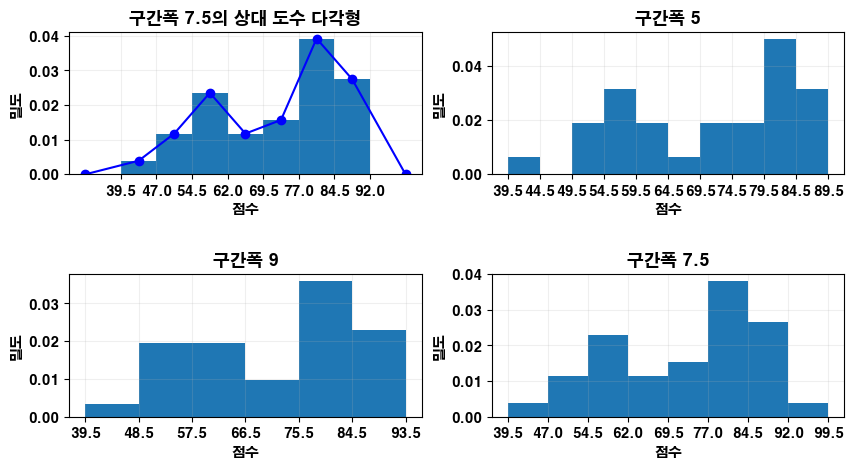

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

student_result = np.array([54,80,83,42,86,63,63,57,71,84,77,59, #학생들의 점수
                          90,73,81,76,56,81,85,51,94,66,73,88,
                          89,87,56,84,61,78,83,91,58,50,82])

fig, axs = plt.subplots(2, 2, figsize=(10, 5))
plt.subplots_adjust(hspace=0.7)

n, bins, patches = axs[0][0].hist(student_result,bins= np.arange(39.5,92.1,7.5), density=True)

axs[0][0].set_title('구간폭 7.5의 상대 도수 다각형')
axs[0][0].set_xlabel('점수')
axs[0][0].set_ylabel('밀도')
axs[0][0].set_xticks(bins)

hist_center= [(bins[i]+bins[i+1])/2 for i in range(0,len(bins)-1)] # 도수다각형을 그리기위한 x의 구간별 중간 값 저장
w_bin = bins[1]-bins[0]               #간격 저장
hist_center.insert(0,bins[0]-w_bin)    #도수다각형 표가 끊기지 않게 x값 설정
hist_center.append(bins[-1]+w_bin)
n= np.append(n,0)                      #도수다각형 표가 끊기지 않게 y값 설정
n= np.insert(n,0,0)
axs[0][0].plot(hist_center,n,'blue',marker='o') #히스토그램에 line plot추가
plt.xticks(bins)
plt.xlabel('점수')
plt.ylabel('밀도')
axs[0][0].grid(True, alpha= 0.2)                #표 배경에 그리드 를 나타내준다 alpha는 투명도를 나타낸다

n, bins, patches = axs[0][1].hist(student_result,bins= np.arange(39.5,92.1,5), density=True)

axs[0][1].set_title('구간폭 5')
axs[0][1].set_xlabel('점수')
axs[0][1].set_ylabel('밀도')
axs[0][1].set_xticks(bins)
axs[0][1].grid(True, alpha= 0.2) 
n, bins, patches = axs[1][0].hist(student_result, bins=np.arange(39.5, 100, 9), density=True)

axs[1][0].set_title('구간폭 9')
axs[1][0].set_xlabel('점수')
axs[1][0].set_ylabel('밀도')
axs[1][0].set_xticks(bins)
axs[1][0].grid(True, alpha= 0.2) 

n, bins, patches = axs[1][1].hist(student_result, bins=np.arange(39.5, 100, 7.5), density=True)
axs[1][1].set_title('구간폭 7.5')
axs[1][1].set_xlabel('점수')
axs[1][1].set_ylabel('밀도')
axs[1][1].set_xticks(bins)
axs[1][1].grid(True, alpha= 0.2)  
plt.show()

## 연습문제 6.1
매출액 기준 상위 200개 제조업체의 내년도 투자심리도를 조사하였다. 응답을 한 162개 제조업체의 금년대비 내년의 투자증감계획을 업종별로 정리한 자료는 다음과 같다. 예를 들어 A업종에 해당되는 18개 기업 중 27.8%는 감축, 22.2%는 동일수준, 50%는 증가할 계획이다.

#### loc, iloc 함수
두 함수를 사용하여 원하는 행 또는 열에 인덱싱, 슬라이싱이 가능하다.
<br> *loc[행인덱스]->row조회
<br> *loc[행인덱스, 칼럼명] -> row&column 조회
<br>
<br> *iloc[행인덱스번호] -> row조회
<br> *iloc[행인덱스번호,열인덱스번호] -> row&column 조회

In [86]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
sample={'업종':['A','B','C','D','E','F','G','H','I','J','K','L','M','N'],
           '회사수':[18,14,9,19,7,6,6,14,19,9,17,10,6,8],
           '감축(%)':[27.8,14.3,44.4,10.5,14.3,16.7,100.0,28.6,26.3,11.1,23.5,20.0,0.0,75.0],
           '동일수준(%)':[22.2,50.0,22.2,42.1,0.0,16.7,0.0,0.0,5.3,33.3,11.8,40.0,16.7,12.5],
           '증가(%)':[50.0,35.7,33.3,47.4,85.7,66.7,0.0,71.4,68.4,55.5,64.7,40.0,83.3,12.5]}
sample= pd.DataFrame(sample)
sample= sample.set_index('업종')
for i in range(len(sample)):
    max_value = max(sample.iloc[i, 1:])
    if max_value == sample.iloc[i, 1]:
        sample.loc[sample.index[i], '투자증감구분'] = '감축'     #최댓값이 감축 열에 있으면 감축 저장
    elif max_value == sample.iloc[i, 2]:
        sample.loc[sample.index[i], '투자증감구분'] = '동일수준' #최댓값이 동일수준 열에 있으면 동일수준 저장
    else:
        sample.loc[sample.index[i], '투자증감구분'] = '증가'     #최댓값이 증가 열에 있으면 증가 저장
sample

,회사수,감축(%),동일수준(%),증가(%),투자증감구분
업종,,,,,
A,18,27.8,22.2,50.0,증가
B,14,14.3,50.0,35.7,동일수준
C,9,44.4,22.2,33.3,감축
D,19,10.5,42.1,47.4,증가
E,7,14.3,0.0,85.7,증가
F,6,16.7,16.7,66.7,증가
G,6,100.0,0.0,0.0,감축
H,14,28.6,0.0,71.4,증가
I,19,26.3,5.3,68.4,증가


#### (1)응답을 한 162개 제조업체를 투자 증가, 동일수준, 감축의 3범주로 그룹화하여 원형그래프와 상대도수 막대그래프를 작성하라.

#### 원형그래프

In [103]:
sample2= pd.crosstab(sample['투자증감구분'], columns='도수')
sample2['상대도수'] = sample2['도수'] / sum(sample2['도수'])
sample2

col_0,도수,상대도수
투자증감구분,,
감축,3,0.214286
동일수준,2,0.142857
증가,9,0.642857


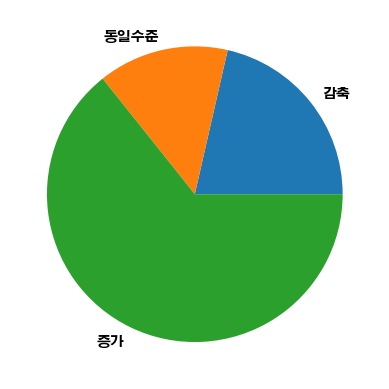

In [88]:
plt.figure()
plt.pie(sample2['도수'], labels=['감축','동일수준','증가'])
plt.show()

#### 상대도수 막대그래프

In [89]:
sample2['상대도수'] = sample2['도수'] / sum(sample2['도수'])
sample2

col_0,도수,상대도수
투자증감구분,,
감축,3,0.214286
동일수준,2,0.142857
증가,9,0.642857


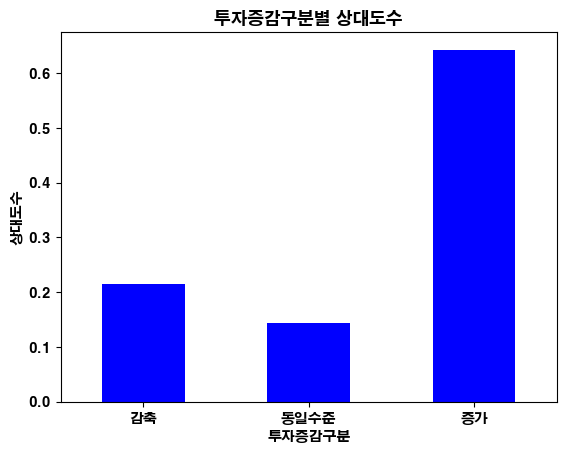

In [90]:
plt.figure()
sample2['상대도수'].plot(kind='bar', color='blue')
plt.title('투자증감구분별 상대도수')
plt.xlabel('투자증감구분')
plt.ylabel('상대도수')
plt.xticks(rotation=0)
plt.show()

#### (2)문제(1)에서 구한 그림을 이용하여 제조업체의 내년도 투자심리를 예측하라.

원형그래프와 막대그래프의 결과와 같이 내년 제조업체의 투자심리는 증가로 사료된다.

## 연습문제 6.2 
위의 종합문제 6.1에서 투자를 증가하기로 계획한 기업의 69.4% 정도는 금년대비 20% 이상, 30.6%는 20% 미만 증가할 예정이라고 한다. 또한, 투자를 감축하려는 기업의 72.1% 정도는 20% 이상, 27.9%는 20% 미만 감축할 예정이라고한다.

In [104]:
sample

,회사수,감축(%),동일수준(%),증가(%),투자증감구분
업종,,,,,
A,18,27.8,22.2,50.0,증가
B,14,14.3,50.0,35.7,동일수준
C,9,44.4,22.2,33.3,감축
D,19,10.5,42.1,47.4,증가
E,7,14.3,0.0,85.7,증가
F,6,16.7,16.7,66.7,증가
G,6,100.0,0.0,0.0,감축
H,14,28.6,0.0,71.4,증가
I,19,26.3,5.3,68.4,증가


## 연습문제 6.11 
다음은 올림픽(1908 ~ 2020) 남자 400m 자유형에서 우승한 선수의 기록이다.

In [137]:
result= {'연도':[1908,1912,1920,1924,1928,1932,1936,1947,1952,1956,1960,1964,1968,1972,1976,1980,1984,1988,1992,1996,2000,2004,2008,2012,2016,2021],
        '기록':[53580,52440,52680,50420,50160,44840,44450,44100,43070,42730,41830,41220,40900,40027,35493,35131,35123,34695,34500,34797,34059,34310,34186,34014,34155,34336]}

result= pd.DataFrame(result)
result

,연도,기록
0,1908,53580
1,1912,52440
2,1920,52680
3,1924,50420
4,1928,50160
5,1932,44840
6,1936,44450
7,1947,44100
8,1952,43070
9,1956,42730


#### (1)점도표를 그리고, 점에 연도를 명시하라.

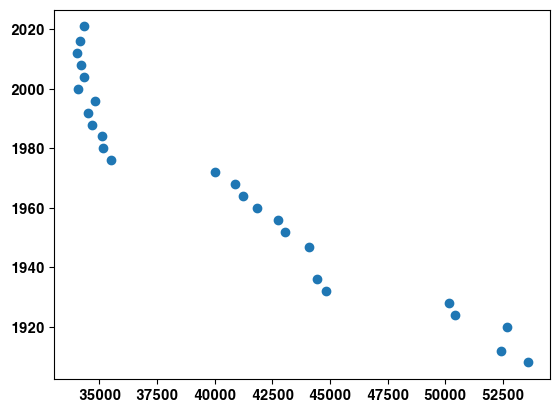

In [158]:
y = result['연도']
x = result['기록']

plt.scatter(x,y)
plt.show()

#### (2)이 자료에 있어 도수분보표의 작성이 무적절함을 설명하라.
자료의 형태가 횟수 또는 갯수를 셀 수 있는 수치형의 이산형이 아닌 관측값 즉, 수치형의 연속의 형질을 띄고 있음으로 도수분포표보다는 점도표가 더 적절하다.